# Leopard challenge: Regression

## Загрузка данных
#### Данные беру из leopard-challenge-regression.zip

https://drive.google.com/file/d/1P3aYu5kdMLOVxgl2K6wjzx-HtWB5J_wu/view?usp=sharing

# Colab

In [1]:
! gdown --id 1P3aYu5kdMLOVxgl2K6wjzx-HtWB5J_wu

"gdown" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


! unzip /content/leopard-challenge-regression.zip -d /content/leopard_challenge_regression/

In [9]:
! unzip / content / leopard-challenge-regression.zip -d / content / leopard_challenge_regression /

"unzip" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [32]:
import pandas as pd

In [6]:
train = pd.read_csv('/content/leopard_challenge_regression/train.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/content/leopard_challenge_regression/train.csv'

In [7]:
train.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,id
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0,34302
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0,33247
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0,31886
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,1.0,94.0,NaN,NaN,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019.0,18999
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0,16809


# Pycharm

In [1]:
from zipfile import ZipFile

with ZipFile('leopard-challenge-regression.zip', 'r') as zf:
    zf.extractall()

# 1. Задача

Даны данные о ценах на недвижимость в Мельбурне.
Каждая строчка в датасете - какой-то объект недвижимости, по которому известны некоторые его параметры и его цена.
**Задача:** по параметрам определить цену объекта.

# 2. Импорт библиотек

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
from feature_engine.selection import SmartCorrelatedSelection
from feature_engine.imputation import RandomSampleImputer
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor, Pool, cv
import joblib

plt.style.use('dark_background')
pd.set_option('display.max_columns', 100)

# 3. Загрузка Датасета

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,id
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0,34302
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0,33247
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0,31886
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019.0,18999
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0,16809


In [4]:
df.shape

(18373, 22)

In [5]:
df_test = pd.read_csv('test.csv')

In [6]:
df_test.head()

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,id
0,Abbotsford,513/6 Acacia Pl,3,u,S,Dingle,7/10/2017,3.0,3067.0,NaN,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0,30130
1,Abbotsford,60 Charles St,3,h,S,Jellis,7/10/2017,3.0,3067.0,3.0,1.0,NaN,192.0,109.0,1900.0,Yarra City Council,-37.80792,144.99508,Northern Metropolitan,4019.0,18311
2,Abbotsford,38 Studley St,3,h,S,Nelson,7/10/2017,3.0,3067.0,3.0,1.0,1.0,159.0,93.0,1890.0,Yarra City Council,-37.80124,144.99459,Northern Metropolitan,4019.0,18934
3,Airport West,18 Glenys Av,3,h,S,Raine,7/10/2017,10.4,3042.0,3.0,1.0,5.0,536.0,108.0,1980.0,Moonee Valley City Council,-37.72285,144.87539,Western Metropolitan,3464.0,1824
4,Airport West,35 Thomas St,3,h,S,Nelson,7/10/2017,10.4,3042.0,3.0,1.0,1.0,NaN,130.0,2009.0,Moonee Valley City Council,-37.71754,144.87704,Western Metropolitan,3464.0,31339


In [7]:
df_test.shape

(8818, 21)

# 4. Получение информации о Датасете

## 4.1 Подготовка таблиц

#### Перевод названия колонок в строчные буквы

In [8]:
df.columns = df.columns.str.lower()
df_test.columns = df_test.columns.str.lower()

#### Перевод даты в datetime

In [11]:
df.date = pd.to_datetime(df.date, format='%d/%m/%Y')
df_test.date = pd.to_datetime(df_test.date, format='%d/%m/%Y')

## 4.2 Основная информация о датасете

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18373 entries, 0 to 18372
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   suburb         18373 non-null  object        
 1   address        18373 non-null  object        
 2   rooms          18373 non-null  int64         
 3   type           18373 non-null  object        
 4   price          18373 non-null  float64       
 5   method         18373 non-null  object        
 6   sellerg        18373 non-null  object        
 7   date           18373 non-null  datetime64[ns]
 8   distance       18373 non-null  float64       
 9   postcode       18373 non-null  float64       
 10  bedroom2       14905 non-null  float64       
 11  bathroom       14903 non-null  float64       
 12  car            14798 non-null  float64       
 13  landsize       13579 non-null  float64       
 14  buildingarea   7750 non-null   float64       
 15  yearbuilt      8944

**Обучающая таблица состоит из:** 18373 строк и 22 столбцов

In [17]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8818 entries, 0 to 8817
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   suburb         8818 non-null   object        
 1   address        8818 non-null   object        
 2   rooms          8818 non-null   int64         
 3   type           8818 non-null   object        
 4   method         8818 non-null   object        
 5   sellerg        8818 non-null   object        
 6   date           8818 non-null   datetime64[ns]
 7   distance       8817 non-null   float64       
 8   postcode       8817 non-null   float64       
 9   bedroom2       5858 non-null   float64       
 10  bathroom       5854 non-null   float64       
 11  car            5582 non-null   float64       
 12  landsize       4365 non-null   float64       
 13  buildingarea   2882 non-null   float64       
 14  yearbuilt      3112 non-null   float64       
 15  councilarea    8816 n

**Тестовая таблица состоит из:** 8818 строк и 21 столбца

## 4.3 Пропущенные значения

In [18]:
df.isna().mean()

suburb           0.000000
address          0.000000
rooms            0.000000
type             0.000000
price            0.000000
method           0.000000
sellerg          0.000000
date             0.000000
distance         0.000000
postcode         0.000000
bedroom2         0.188755
bathroom         0.188864
car              0.194579
landsize         0.260926
buildingarea     0.578185
yearbuilt        0.513199
councilarea      0.000054
lattitude        0.181353
longtitude       0.181353
regionname       0.000054
propertycount    0.000054
id               0.000000
dtype: float64

In [19]:
df_test.isna().mean()

suburb           0.000000
address          0.000000
rooms            0.000000
type             0.000000
method           0.000000
sellerg          0.000000
date             0.000000
distance         0.000113
postcode         0.000113
bedroom2         0.335677
bathroom         0.336131
car              0.366977
landsize         0.504990
buildingarea     0.673169
yearbuilt        0.647086
councilarea      0.000227
lattitude        0.330007
longtitude       0.330007
regionname       0.000227
propertycount    0.000227
id               0.000000
dtype: float64

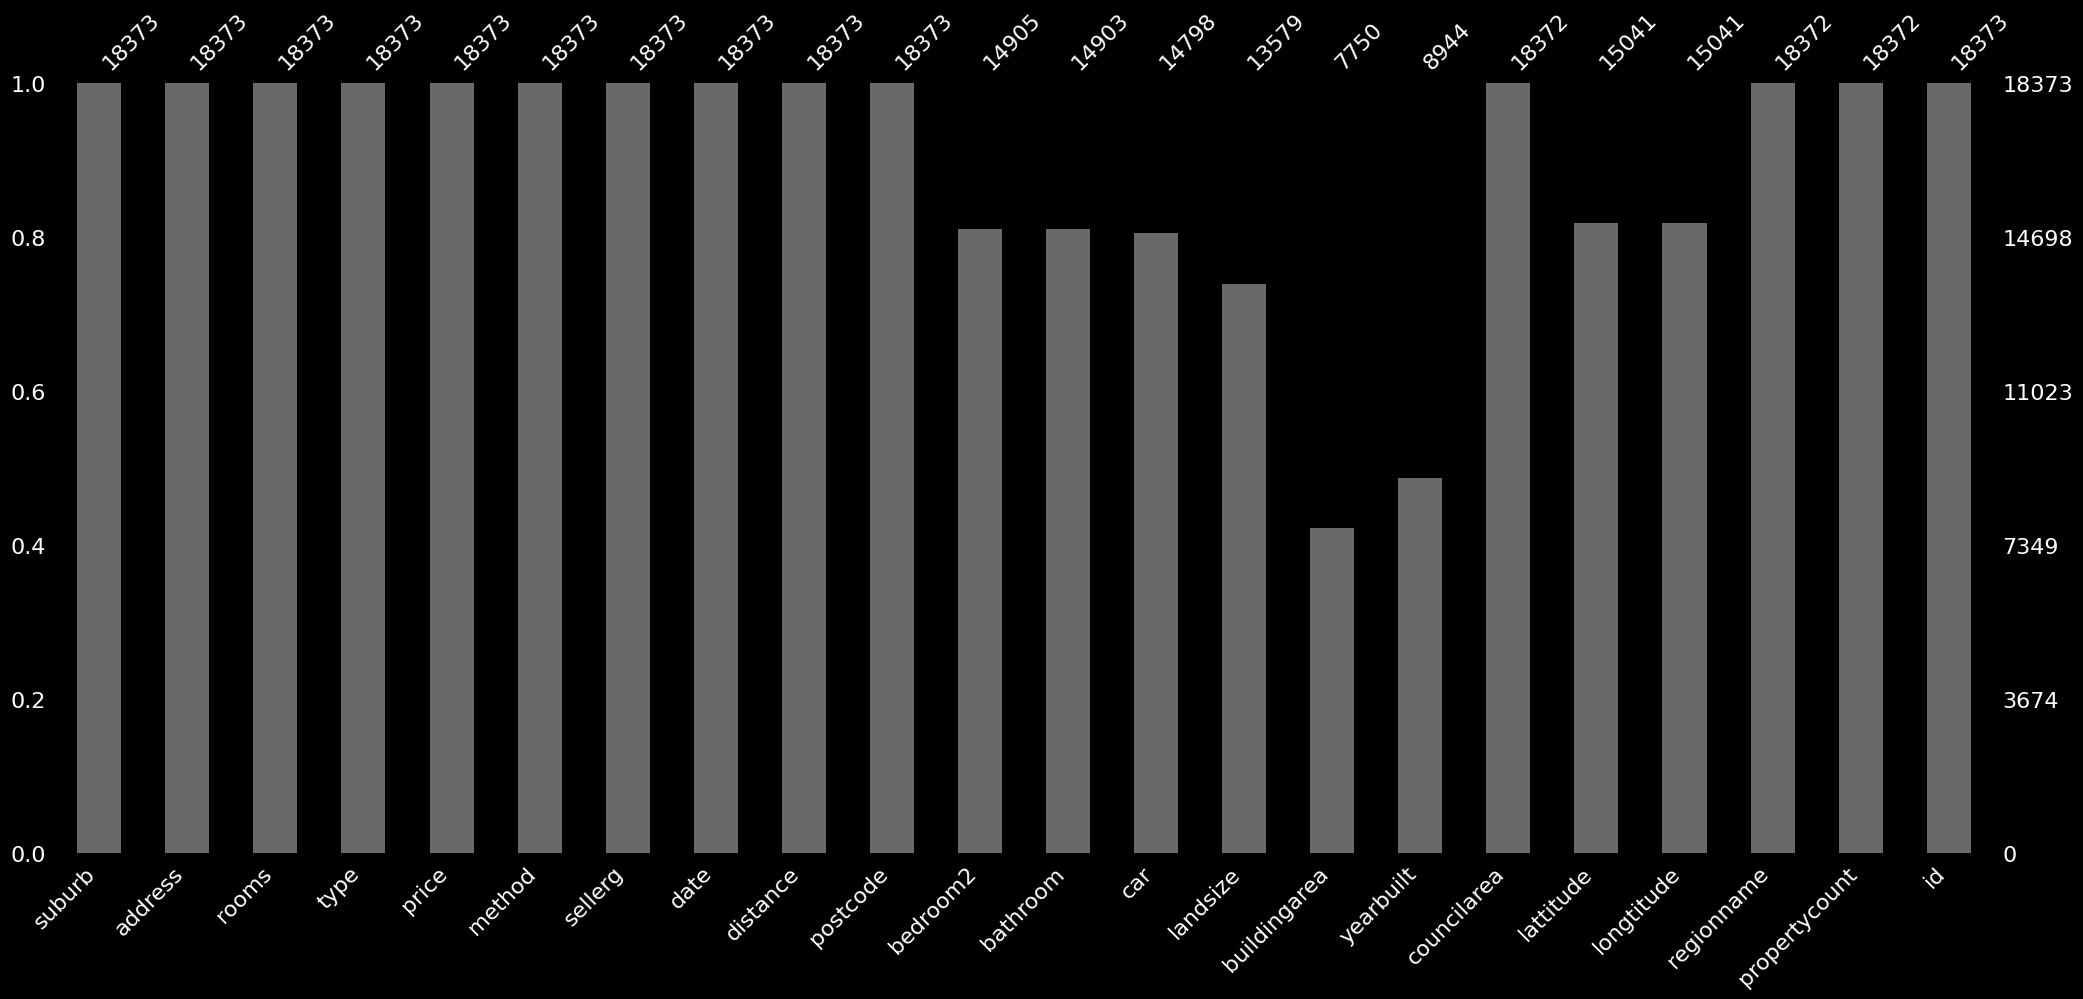

In [20]:
msno.bar(df);

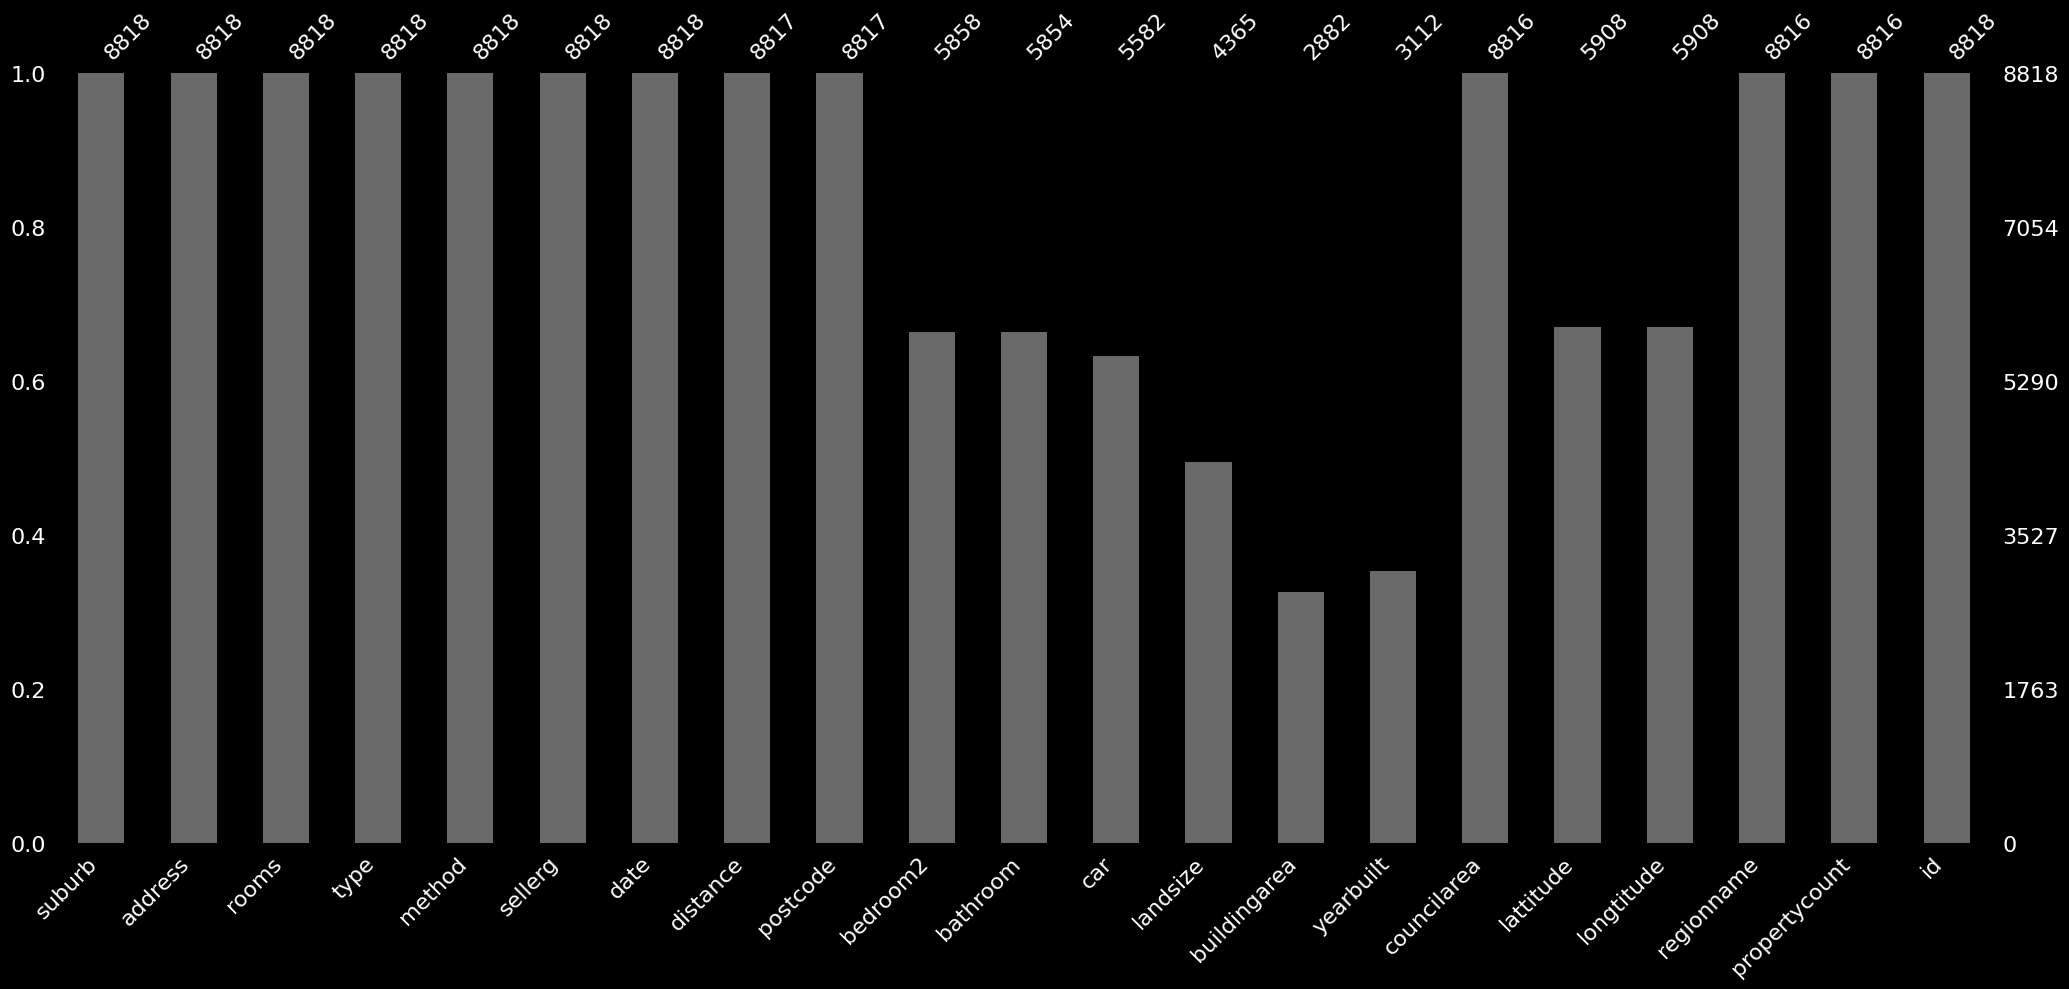

In [22]:
msno.bar(df_test);

**Пропущенные значения находятся в столбцах:** bedroom2, bathroom, car, landsize, buildingarea, yearbuilt, councilarea, lattitude, longtitude, regionname, propertycount.

## 4.4 Дубликаты

In [24]:
df.duplicated().sum()

0

In [25]:
df_test.duplicated().sum()

0

**Дубликаты отсутствуют!**

# Анализ данных

### EDA